In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading both training and testing dataset.

In [54]:
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

In [55]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#Performing exploratory data analysis and filling missing values

In [57]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [58]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [59]:
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [60]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [61]:
train_df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [62]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age']).mean()

In [63]:
most_embarked = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(most_embarked)

In [64]:
train_df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [65]:
test_df.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [66]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age']).mean()

In [67]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare']).mean()

In [68]:
test_df.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


<Axes: >

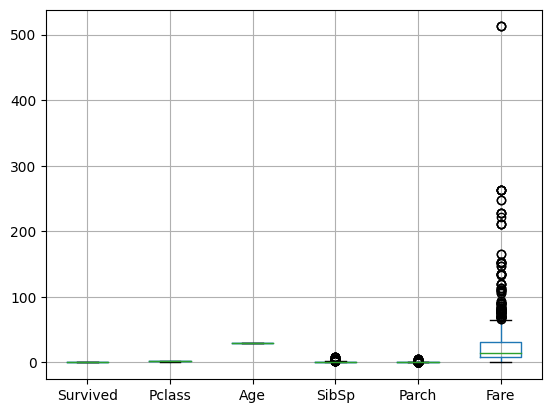

In [69]:
train_df.boxplot()

In [70]:
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_df = train_df[(train_df['Fare'] >= lower_bound) & (train_df['Fare'] <= upper_bound)]

<Axes: >

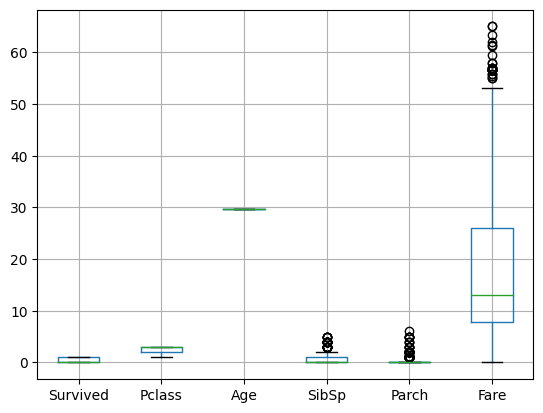

In [71]:
train_df.boxplot()

<Axes: >

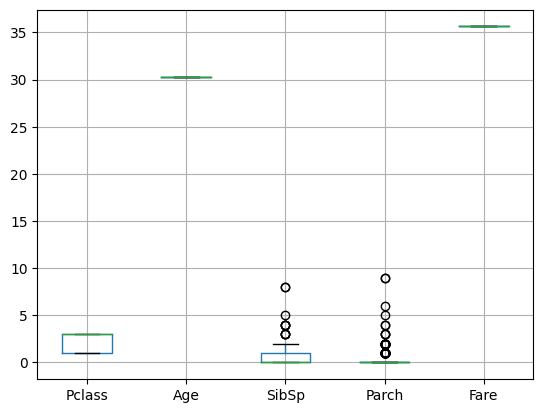

In [72]:
test_df.boxplot()

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

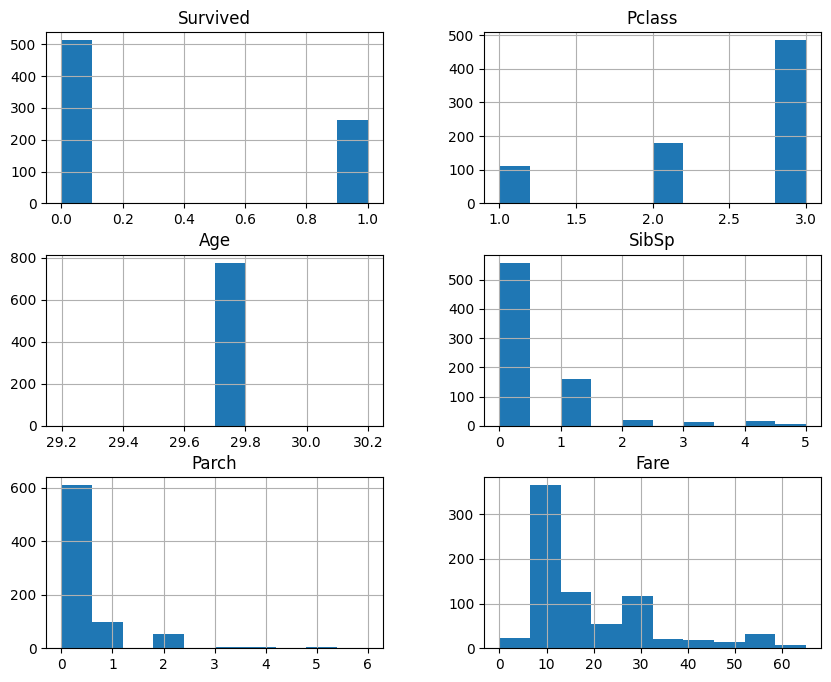

In [73]:
train_df.hist(figsize=(10,8))

In [74]:
train_df['Embarked'].value_counts()

,count
Embarked,
S,584
C,116
Q,75


#Performing Data preprocessing.

In [75]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

o_encoder = OneHotEncoder(sparse_output=False)
l_encoder = LabelEncoder()

train_df['Sex'] = o_encoder.fit_transform(train_df[['Sex']])
train_df['Embarked'] = l_encoder.fit_transform(train_df[['Embarked']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,29.699118,1,0,7.2500,2
2,1,3,1.0,29.699118,0,0,7.9250,2
3,1,1,1.0,29.699118,1,0,53.1000,2
4,0,3,0.0,29.699118,0,0,8.0500,2
5,0,3,0.0,29.699118,0,0,8.4583,1


In [77]:
test_df['Sex'] = o_encoder.fit_transform(test_df[['Sex']])
test_df['Embarked'] = l_encoder.fit_transform(test_df[['Embarked']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0.0,30.27259,0,0,35.627188,1
1,3,1.0,30.27259,1,0,35.627188,2
2,2,0.0,30.27259,0,0,35.627188,1
3,3,0.0,30.27259,0,0,35.627188,2
4,3,1.0,30.27259,1,1,35.627188,2


In [79]:
x_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
x_test = test_df.copy()

**We prepare the data for the model building.**

In [80]:
x_train.head(), y_train.head()

(   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
 0       3  0.0  29.699118      1      0   7.2500         2
 2       3  1.0  29.699118      0      0   7.9250         2
 3       1  1.0  29.699118      1      0  53.1000         2
 4       3  0.0  29.699118      0      0   8.0500         2
 5       3  0.0  29.699118      0      0   8.4583         1,
 0    0
 2    1
 3    1
 4    0
 5    0
 Name: Survived, dtype: int64)

**Building model.**

In [81]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

In [82]:
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
y_pred1 = xgb_model.predict(x_test)

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [85]:
accuracy_score(y_train, xgb_model.predict(x_train))

0.9019354838709678

#Using techniques like cross validation and hyperparameter tuning (GridSearchCV)

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
cv_scores = cross_val_score(xgb_model, x_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean()}")

Cross-Validation Accuracy: 0.7858064516129032


In [88]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(use_label_encoder=False)

In [89]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

In [90]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [91]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 0.8129032258064516


In [92]:
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(x_train)

In [93]:
accuracy = accuracy_score(y_train, y_train_pred)
print(accuracy)

0.8774193548387097


In [94]:
report = classification_report(y_train, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       512
           1       0.87      0.75      0.81       263

    accuracy                           0.88       775
   macro avg       0.87      0.85      0.86       775
weighted avg       0.88      0.88      0.88       775



In [95]:
!pip install lightgbm

In [96]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()

In [97]:
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 263, number of negative: 512
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 128
[LightGBM] [Info] Number of data points in the train set: 775, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.339355 -> initscore=-0.666171
[LightGBM] [Info] Start training from score -0.666171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [98]:
y_train_pred1 = lgb_model.predict(x_train)

In [99]:
accuracy1 = accuracy_score(y_train, y_train_pred1)
print(accuracy1)

0.8774193548387097


In [100]:
report1 = classification_report(y_train, y_train_pred1)
print(report1)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       512
           1       0.86      0.76      0.81       263

    accuracy                           0.88       775
   macro avg       0.87      0.85      0.86       775
weighted avg       0.88      0.88      0.88       775



#Comparision Analysis

Based on the accuracy scores, both the LightGBM and XGBoost have the almost same performance, it slightly vary from each other, after using GridSearchCV.

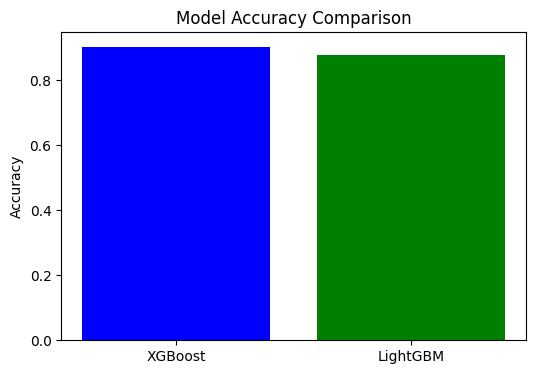

In [102]:
xgb_accuracy = accuracy_score(y_train, xgb_model.predict(x_train))
lgb_accuracy = accuracy_score(y_train, lgb_model.predict(x_train))

plt.figure(figsize=(6, 4))
plt.bar(['XGBoost', 'LightGBM'], [xgb_accuracy, lgb_accuracy], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

**The bar chart shows the overall accuracy of both models. Here we see that XGBoost has slightly higher accuracy than the LightBGM.**

In [103]:
from sklearn.metrics import roc_curve, auc

In [104]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_train, xgb_model.predict_proba(x_train)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

In [105]:
fpr_lgb, tpr_lgb, _ = roc_curve(y_train, lgb_model.predict_proba(x_train)[:, 1])
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

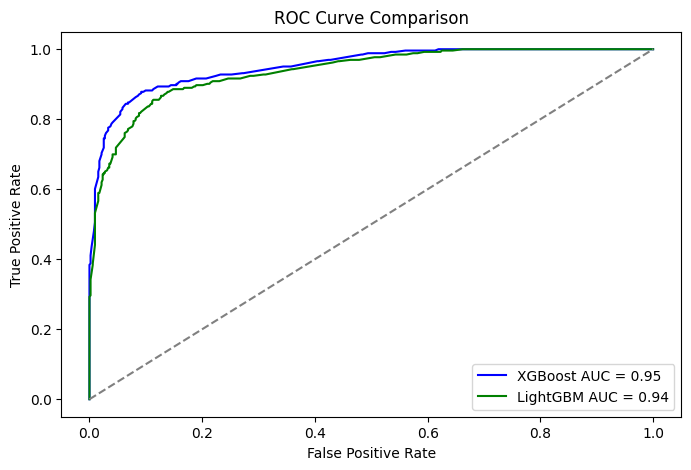

In [107]:
plt.figure(figsize=(8, 5))
plt.plot(fpr_xgb, tpr_xgb, color='blue', label=f'XGBoost AUC = {roc_auc_xgb:.2f}')
plt.plot(fpr_lgb, tpr_lgb, color='green', label=f'LightGBM AUC = {roc_auc_lgb:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

**From the above roc curve we infer that:**

-> Both XGBoost and LightGBM models exhibit good performance as their ROC curves are significantly above the diagonal line.

-> In this case, XGBoost has a slightly higher AUC value than LightGBM.

-> The ROC curve helps in visualizing the performance of models and selecting an optimal classification threshold.


#A brief report summarizing the comparative analysis results and practical implications.

This report summarizes the comparative analysis of XGBoost and LightGBM, for predicting survival on the Titanic. Both models were trained and evaluated using the Titanic dataset.

**Model Accuracy:**

Both XGBoost and LightGBM achieved high accuracy in predicting survival on the Titanic. However, based on our analysis:

-> XGBoost demonstrated slightly better accuracy than LightGBM, as seen in the bar chart.

-> XGBoost also had a slightly higher Area Under the Curve (AUC) in the ROC curve analysis, suggesting a slightly better ability to distinguish between survivors and non-survivors.

-> Both XGBoost and LightGBM are strong predictive models for the Titanic survival prediction task.  For this dataset, XGBoost offers a marginal advantage, but the choice between the two would likely depend on factors such as computational efficiency, interpretability needs, and specific requirements of the project.


